In [ ]:
# Copyright (c) 2017 Ben Poole & Friedemann Zenke
# MIT License -- see LICENSE for details
# 
# This file is part of the code to reproduce the core results of:
# Zenke, F., Poole, B., and Ganguli, S. (2017). Continual Learning Through
# Synaptic Intelligence. In Proceedings of the 34th International Conference on
# Machine Learning, D. Precup, and Y.W. Teh, eds. (International Convention
# Centre, Sydney, Australia: PMLR), pp. 3987–3995.
# http://proceedings.mlr.press/v70/zenke17a.html

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("white")

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data
n_tasks = 10
all_evals   = utils.load_zipped_pickle("data_path_int[omega_decay=sum,xi=0.1]_optadam_lr1.00e-03_bs256_ep20_tsks10.pkl.gz")

In [3]:
keys = list(all_evals.keys())
sorted_keys = np.sort(keys)
print(sorted_keys)

[0.   0.01 0.1  1.  ]


In [4]:
sns.set_context("paper")
sns.set_style('ticks')

In [5]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [6]:
def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [7]:
def plot_data():
    marker = iter(['o', 's', 's', 'd', 'o'])
    plot_kwargs = dict(alpha=0.9)
      
    for cval in sorted_keys:
        stuff = []
        for i in range(len(all_evals[cval])):#n_tasks):
            stuff.append(all_evals[cval][i][:i+1].mean())
        plot(range(1,n_tasks+1), stuff, '%s-'%next(marker), label="Test (c=%g)"%cval, zorder=2, **plot_kwargs)

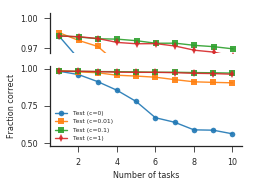

In [8]:
fig = plt.figure(figsize=(3.3,2.4))
# fig, ax = plt.subplots()
# plt.rc('font', family='serif', serif='Times')
gs = GridSpec(2, 1, height_ratios=[0.5, 1])
ax = plt.subplot(gs[0])
plot_data()
# Training error for control network -- trained conventionally
# plt.arrow(10.5, 0.995198, -0.2, 0, head_width=0.005, head_length=0.2, fc='k', ec='k')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='on')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.get_yaxis().tick_left()
ylim(0.965, 1.005)
yticks([0.97, 1.0])
xlim(0.5, 10.46)

ax2 = plt.subplot(gs[1])
plot_data()

xlabel('Number of tasks')
ylabel('Fraction correct')
ylim(0.48, 1.02)
xlim(0.5, 10.5)
simple_axis(ax2)
yticks([0.5, 0.75, 1.0])

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

legend(loc='lower left', fontsize=6)

plt.subplots_adjust(left=.18, bottom=.20, right=.99, top=.97)
plt.savefig("accuracy_vs_nbtasks.pdf", pad_inches=0)